In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    "./challenge-9-bike.csv"
)
# 单车经纬度信息
df.describe()

,lat,lon
count,3000.000000,3000.000000
mean,39.908308,116.474630
std,0.007702,0.018098
min,39.893939,116.434264
25%,39.902769,116.461276
50%,39.907888,116.477683
75%,39.914482,116.490274
max,39.923023,116.501467


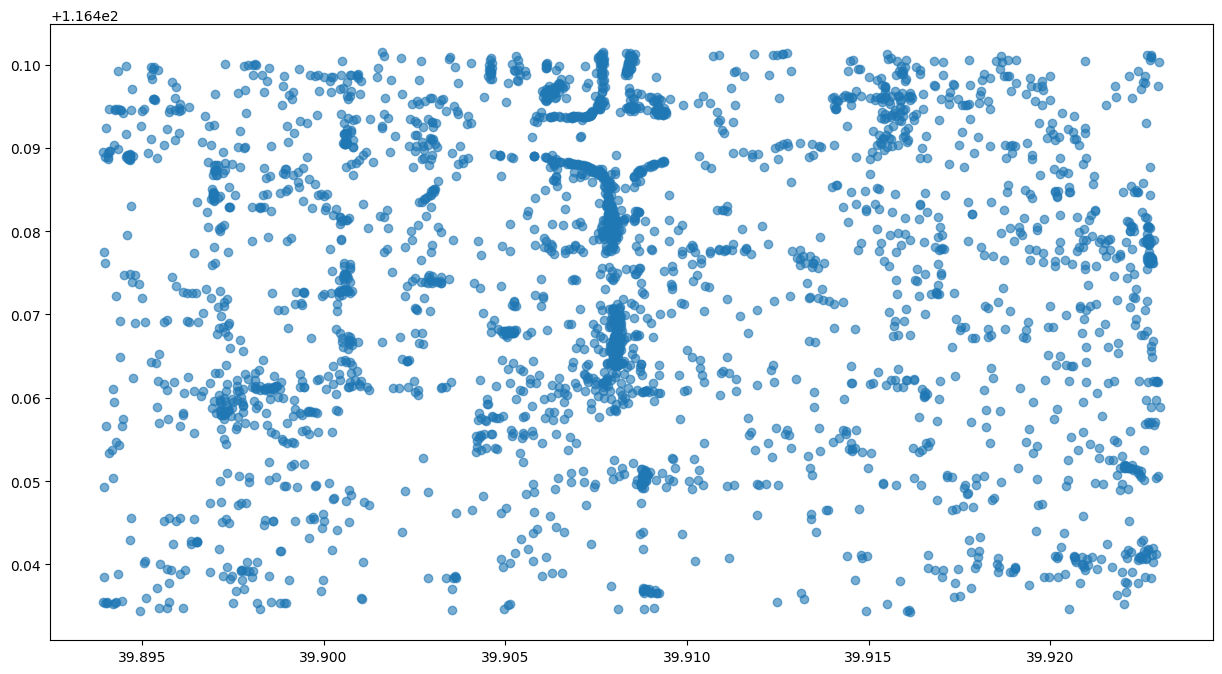

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(15, 8))
plt.scatter(df["lat"], df["lon"], alpha=0.6)

In [5]:
from sklearn.cluster import DBSCAN

# 数据尺寸是100km
# 100米 = 0.01
model = DBSCAN(eps=0.001,min_samples=10)
dbscan_c = model.fit_predict(df)
dbscan_c

array([ 0,  1, -1, ...,  2, 12, 12], dtype=int64)

In [6]:
np.mean(dbscan_c)

6.977333333333333

<Figure size 1500x800 with 0 Axes>

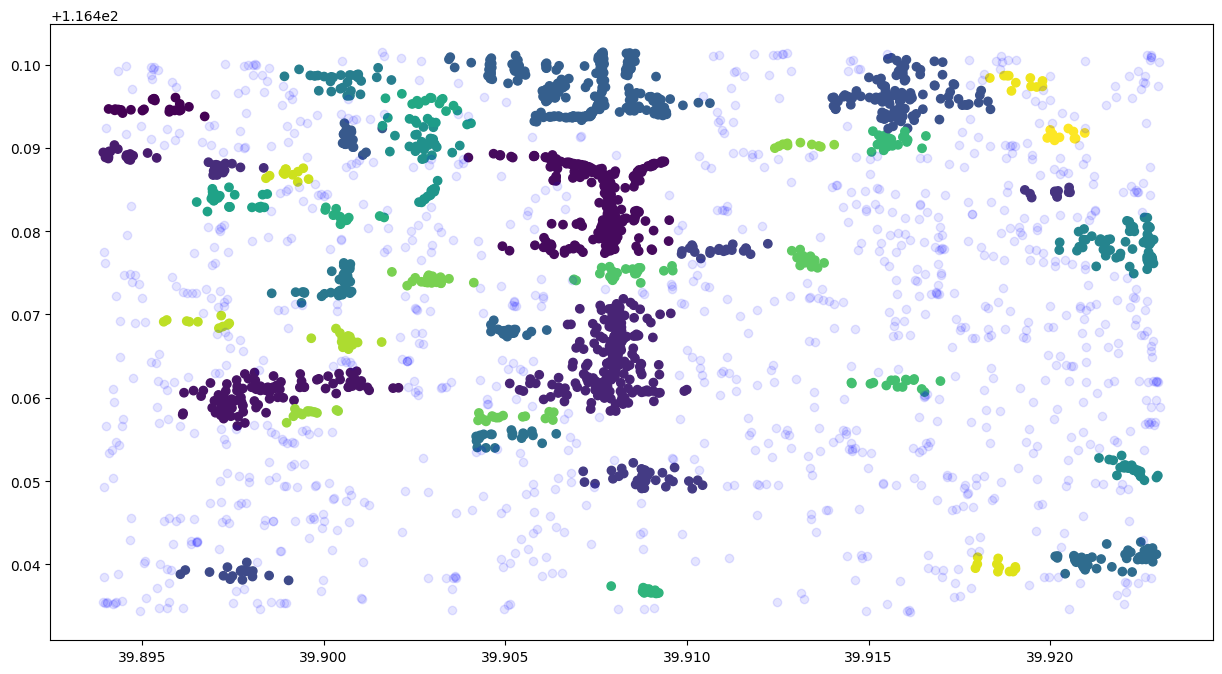

In [9]:
plt.figure(figsize=(15, 8))

# 将聚类结果拼接到数据中
df_c = pd.concat([df, pd.DataFrame(dbscan_c, columns=['clusters'])], axis=1)

# 非异常点筛选
df_n = df_c[df_c['clusters']!=-1]

# 异常点筛选
df_o = df_c[df_c['clusters']==-1]

# 分别绘制
plt.figure(figsize=(15,8))
plt.scatter(df_n['lat'], df_n['lon'], c=df_n['clusters'], cmap='viridis')
plt.scatter(df_o['lat'], df_o['lon'], alpha=.1, c='b')

In [10]:
plt.figure(figsize=(15, 8))
plt.figure(figsize=(15,8))

model1 = DBSCAN(eps=0.001,min_samples=2)
dbscan_c1 = model1.fit_predict(df)
dbscan_c1

array([ 0,  1,  2, ...,  1, 20, 20], dtype=int64)

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [13]:
df_c1 = pd.concat([df, pd.DataFrame(dbscan_c1, columns=['clusters'])], axis=1)

# 非异常点筛选
df_n1 = df_c1[df_c1['clusters']!=-1]

# 异常点筛选
df_o1 = df_c1[df_c1['clusters']==-1]

# 分别绘制
plt.figure(figsize=(15,8))
plt.scatter(df_n1['lat'], df_n1['lon'], c=df_n1['clusters'], cmap='viridis',alpha=.1)
plt.scatter(df_o1['lat'], df_o1['lon'],  c='r')

SyntaxError: invalid syntax (215524518.py, line 11)